# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

AL REALIZAR LA TAREA, TUVE PROBLEMAS CON EL LINK. ME ESTA EXIGIENDO REGISTRARME Y USAR EL TRIAL PARA VER EL GRAFICO DE REVENUE. SE INTENTO
SCRAPEAR INGRESANDO EL USUARIO Y CONTRASEÑA, PERO NO SE LOGRÓ. ME DABA UN ERROR QUE NO PUDE RESOLVER.



PARA CONTINUAR CON EL PROYECTO UTILICE OTRO SITIO WEB QUE MOSTRARÁ EN UNA TABLA EL REVENUE DE TESLA. 

In [44]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [57]:
# URLs
login_url = "https://ycharts.com/login?next=/start_trial"
data_url = "https://ycharts.com/companies/TSLA/revenues"

# Headers para evitar ser bloqueado
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Referer": login_url,
}

# Crear sesión
session = requests.Session()

# Obtener página de login para capturar cookies y CSRF token
login_page = session.get(login_url, headers=headers)
soup = BeautifulSoup(login_page.text, "html.parser")

# Intentar encontrar el token CSRF
csrf_token_input = soup.find("input", {"name": "csrfmiddlewaretoken"})
if csrf_token_input:
    csrf_token = csrf_token_input["value"]
else:
    print("No se encontró el CSRF token. El sitio podría estar bloqueando los bots.")
    exit()

# Mostrar el token CSRF para verificación
print(f"Token CSRF: {csrf_token}")

# Actualizar headers con el CSRF token
session.headers.update({"X-CSRFToken": csrf_token})

# Payload con credenciales y CSRF token
payload = {
    "auth-username": "felipe.browne.le@gmail.com",  # Nombre de campo correcto
    "auth-password": "e2qFdSuVf#Gv4VR",
    "csrfmiddlewaretoken": csrf_token,
}

# Enviar login con cookies y CSRF token
response = session.post(login_url, data=payload, headers=headers, cookies=session.cookies)

# Verificar si la solicitud fue exitosa
if response.ok:
    print("Inicio de sesión exitoso")
    response = session.get(data_url, headers=headers, cookies=session.cookies)
    print(response.text)
else:
    print("Error en el login", response.status_code)
    # Mostrar el contenido completo de la respuesta para depuración
    print(response.text)


Token CSRF: VP3gP79E6hqUs8v29zBIzNnueldl7HWfpFuSrddTB7W51D5dLMU3PXDr8Jm4kfUY
Error en el login 400

<!doctype html>
<html lang="en">
<head>
  <title>Bad Request (400)</title>
</head>
<body>
  <h1>Bad Request (400)</h1><p></p>
</body>
</html>



In [ ]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Headers para evitar bloqueo por User-Agent
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}


# Hacer la solicitud
response = session.get(url, headers=headers)

if '403 ERROR' in response.text:
    print("Acceso denegado. Revisa tus cookies o sesión.")
else:
    print("Acceso exitoso")
    html_data = response.text

Acceso exitoso


In [59]:
#Beatiful Soup
soup = BeautifulSoup(html_data,'html.parser')

soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<link href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue" media="only screen and (max-width: 768px)" rel="alternate"/>
<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Reve

In [60]:
tablas = soup.find_all('table')

tablas

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2024</td>
 <td style="text-align:center">$97,690</td>
 </tr>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 

In [50]:
for index, table in enumerate(tablas):
    if('2011-12-31' in str(table)):
        table_index = index
        break
table_index


1

In [51]:
tablas[table_index]

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2024-12-31</td>
<td style="text-align:center">$25,707</td>
</tr>
<tr>
<td style="text-align:center">2024-09-30</td>
<td style="text-align:center">$25,182</td>
</tr>
<tr>
<td style="text-align:center">2024-06-30</td>
<td style="text-align:center">$25,500</td>
</tr>
<tr>
<td style="text-align:center">2024-03-31</td>
<td style="text-align:center">$21,301</td>
</tr>
<tr>
<td style="text-align:center">2023-12-31</td>
<td style="text-align:center">$25,167</td>
</tr>
<tr>
<td style="text-align:center">2023-09-30</td>
<td style="text-align:center">$23,350</td>
</tr>
<tr>
<td style="text-align:center">2023-06-30</td>
<td style="text-align:center">$24,927</td>
</tr>
<tr>
<td style="text-align:center">2023-03-31</td>
<td style="text-align:center">$23,329<

In [ ]:
import pandas as pd

df_tesla = pd.DataFrame(columns=['Fecha', 'Revenue'])

for row in tablas[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if len(col) == 2:
        Fecha = col[0].text.strip()  # Primera columna: Fecha
        Revenue = col[1].text.strip()  # Segunda columna: Revenue
        df_tesla = pd.concat([df_tesla, pd.DataFrame({'Fecha': [Fecha], 'Revenue (Millions of US $)': [Revenue]})], ignore_index=True)

df_tesla.head()


,Fecha,Revenue,Revenue (Millions of US $)
0,2024-12-31,NaN,"$25,707"
1,2024-09-30,NaN,"$25,182"
2,2024-06-30,NaN,"$25,500"
3,2024-03-31,NaN,"$21,301"
4,2023-12-31,NaN,"$25,167"


In [53]:
df_tesla = df_tesla.drop(columns=['Revenue'])

In [54]:
df_tesla

,Fecha,Revenue (Millions of US $)
0,2024-12-31,"$25,707"
1,2024-09-30,"$25,182"
2,2024-06-30,"$25,500"
3,2024-03-31,"$21,301"
4,2023-12-31,"$25,167"
...,...,...
58,2010-06-30,$28
59,2010-03-31,$21
60,2009-12-31,
61,2009-09-30,$46


In [55]:
conexion = sqlite3.connect('Tesla.db')

conexion

In [56]:
cursor = conexion.cursor()
cursor.execute(""" 
                    CREATE TABLE revenue_tesla_trimestral (Fecha,Renvenue)
               """)

OperationalError: table revenue_tesla_trimestral already exists

In [ ]:
#las tuplas son para guardar más fácil en bbdd. SQL funciona bien ()

tuplas = list(df_tesla.to_records(index=False))

tuplas[:10]

[np.record(('2024-12-31', '$25,707'), dtype=[('Fecha', 'O'), ('Revenue (Millions of US $)', 'O')]),
 np.record(('2024-09-30', '$25,182'), dtype=[('Fecha', 'O'), ('Revenue (Millions of US $)', 'O')]),
 np.record(('2024-06-30', '$25,500'), dtype=[('Fecha', 'O'), ('Revenue (Millions of US $)', 'O')]),
 np.record(('2024-03-31', '$21,301'), dtype=[('Fecha', 'O'), ('Revenue (Millions of US $)', 'O')]),
 np.record(('2023-12-31', '$25,167'), dtype=[('Fecha', 'O'), ('Revenue (Millions of US $)', 'O')]),
 np.record(('2023-09-30', '$23,350'), dtype=[('Fecha', 'O'), ('Revenue (Millions of US $)', 'O')]),
 np.record(('2023-06-30', '$24,927'), dtype=[('Fecha', 'O'), ('Revenue (Millions of US $)', 'O')]),
 np.record(('2023-03-31', '$23,329'), dtype=[('Fecha', 'O'), ('Revenue (Millions of US $)', 'O')]),
 np.record(('2022-12-31', '$24,318'), dtype=[('Fecha', 'O'), ('Revenue (Millions of US $)', 'O')]),
 np.record(('2022-09-30', '$21,454'), dtype=[('Fecha', 'O'), ('Revenue (Millions of US $)', 'O')])]

In [ ]:
cursor.executemany('INSERT INTO revenue_tesla_trimestral VALUES (?,?)', tuplas)
conexion.commit()

In [ ]:
resultado = cursor.execute('select * from revenue_tesla_trimestral')

for row in resultado:
    print (row)

('2024-12-31', '$25,707')
('2024-09-30', '$25,182')
('2024-06-30', '$25,500')
('2024-03-31', '$21,301')
('2023-12-31', '$25,167')
('2023-09-30', '$23,350')
('2023-06-30', '$24,927')
('2023-03-31', '$23,329')
('2022-12-31', '$24,318')
('2022-09-30', '$21,454')
('2022-06-30', '$16,934')
('2022-03-31', '$18,756')
('2021-12-31', '$17,719')
('2021-09-30', '$13,757')
('2021-06-30', '$11,958')
('2021-03-31', '$10,389')
('2020-12-31', '$10,744')
('2020-09-30', '$8,771')
('2020-06-30', '$6,036')
('2020-03-31', '$5,985')
('2019-12-31', '$7,384')
('2019-09-30', '$6,303')
('2019-06-30', '$6,350')
('2019-03-31', '$4,541')
('2018-12-31', '$7,226')
('2018-09-30', '$6,824')
('2018-06-30', '$4,002')
('2018-03-31', '$3,409')
('2017-12-31', '$3,288')
('2017-09-30', '$2,985')
('2017-06-30', '$2,790')
('2017-03-31', '$2,696')
('2016-12-31', '$2,285')
('2016-09-30', '$2,298')
('2016-06-30', '$1,270')
('2016-03-31', '$1,147')
('2015-12-31', '$1,214')
('2015-09-30', '$937')
('2015-06-30', '$955')
('2015-03-31

In [ ]:
#Forma más sencilla para almacenar los datos en sqlite

df_tesla.to_sql('revenue2', con=conexion, index = False)

63

In [ ]:
resultado2 = cursor.execute('select * from revenue2')

for row in resultado2:
    print (row)

('2024-12-31', '$25,707')
('2024-09-30', '$25,182')
('2024-06-30', '$25,500')
('2024-03-31', '$21,301')
('2023-12-31', '$25,167')
('2023-09-30', '$23,350')
('2023-06-30', '$24,927')
('2023-03-31', '$23,329')
('2022-12-31', '$24,318')
('2022-09-30', '$21,454')
('2022-06-30', '$16,934')
('2022-03-31', '$18,756')
('2021-12-31', '$17,719')
('2021-09-30', '$13,757')
('2021-06-30', '$11,958')
('2021-03-31', '$10,389')
('2020-12-31', '$10,744')
('2020-09-30', '$8,771')
('2020-06-30', '$6,036')
('2020-03-31', '$5,985')
('2019-12-31', '$7,384')
('2019-09-30', '$6,303')
('2019-06-30', '$6,350')
('2019-03-31', '$4,541')
('2018-12-31', '$7,226')
('2018-09-30', '$6,824')
('2018-06-30', '$4,002')
('2018-03-31', '$3,409')
('2017-12-31', '$3,288')
('2017-09-30', '$2,985')
('2017-06-30', '$2,790')
('2017-03-31', '$2,696')
('2016-12-31', '$2,285')
('2016-09-30', '$2,298')
('2016-06-30', '$1,270')
('2016-03-31', '$1,147')
('2015-12-31', '$1,214')
('2015-09-30', '$937')
('2015-06-30', '$955')
('2015-03-31

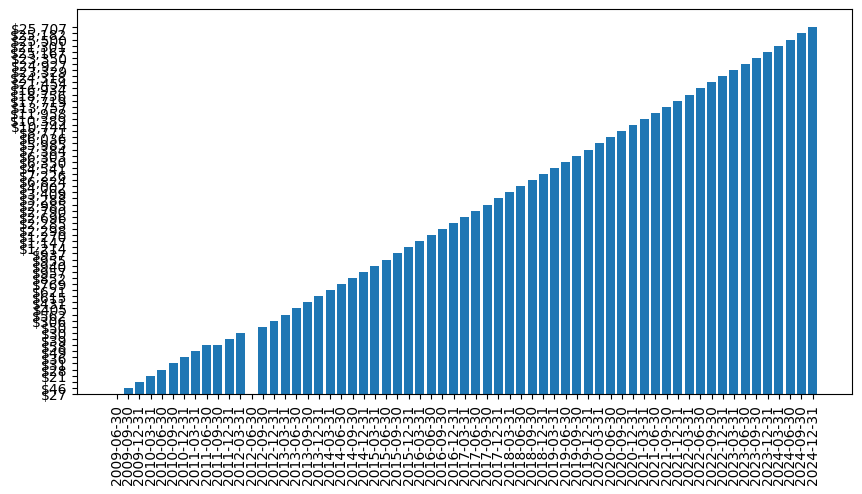

In [ ]:
#Visualizar los datos. Formar larga

plt.figure(figsize=(10,5))

plt.bar(df_tesla['Fecha'][::-1],df_tesla['Revenue (Millions of US $)'][::-1])
plt.xticks(rotation=90)
plt.show()



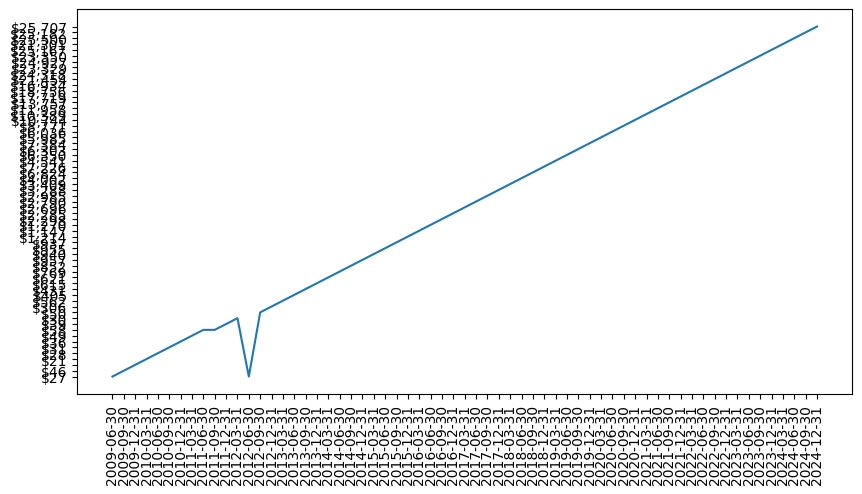

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(df_tesla['Fecha'][::-1],df_tesla['Revenue (Millions of US $)'][::-1])
plt.xticks(rotation=90)
plt.show()

EXTRA: GANANCIA TESLA ULTIMOS AÑOS

Acceso exitoso
